In [1]:
import pandas as pd
import numpy as np 

IMU_COLUMN_NAMES = ['lat','lon','alt','roll','pitch','yaw','vn','ve','vf','vl','vu','ax','ay','az','af',
                    'al','au','wx','wy','wz','wf','wl','wu','posacc','velacc','navstat','numsats','posmode',
                    'velmode','orimode']

def read_imu(path):
    df = pd.read_csv(path,header=None, sep= ' ')
    df.columns = IMU_COLUMN_NAMES
    return df

def comupte_great_circle_distance(lat1, lon1, lat2, lon2):
    delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+\
                        np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos(lon1*np.pi/180-lon2*np.pi/180))
    return 6371000.0 * np.arccos(np.clip(delta_sigma,-1,1))

In [2]:
prev_imu_data = None
gps_distances = []
imu_distances = []
for frame in range(150):
    imu_data = read_imu('./a_data/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    if prev_imu_data is not None:
        gps_distances += [comupte_great_circle_distance(imu_data.lat, imu_data.lon,prev_imu_data.lat, prev_imu_data.lon)]
        imu_distances += [0.1*np.linalg.norm(imu_data[['vf','vl']])]
    prev_imu_data = imu_data

/tmp/ipykernel_419876/1241446800.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+\
/tmp/ipykernel_419876/1241446800.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+\
/tmp/ipykernel_419876/1241446800.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+\
/tmp/ipykernel_419876/1241446800.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  delta_sigma = float(np.sin(lat1*np.pi/180)*np.sin(lat2*n

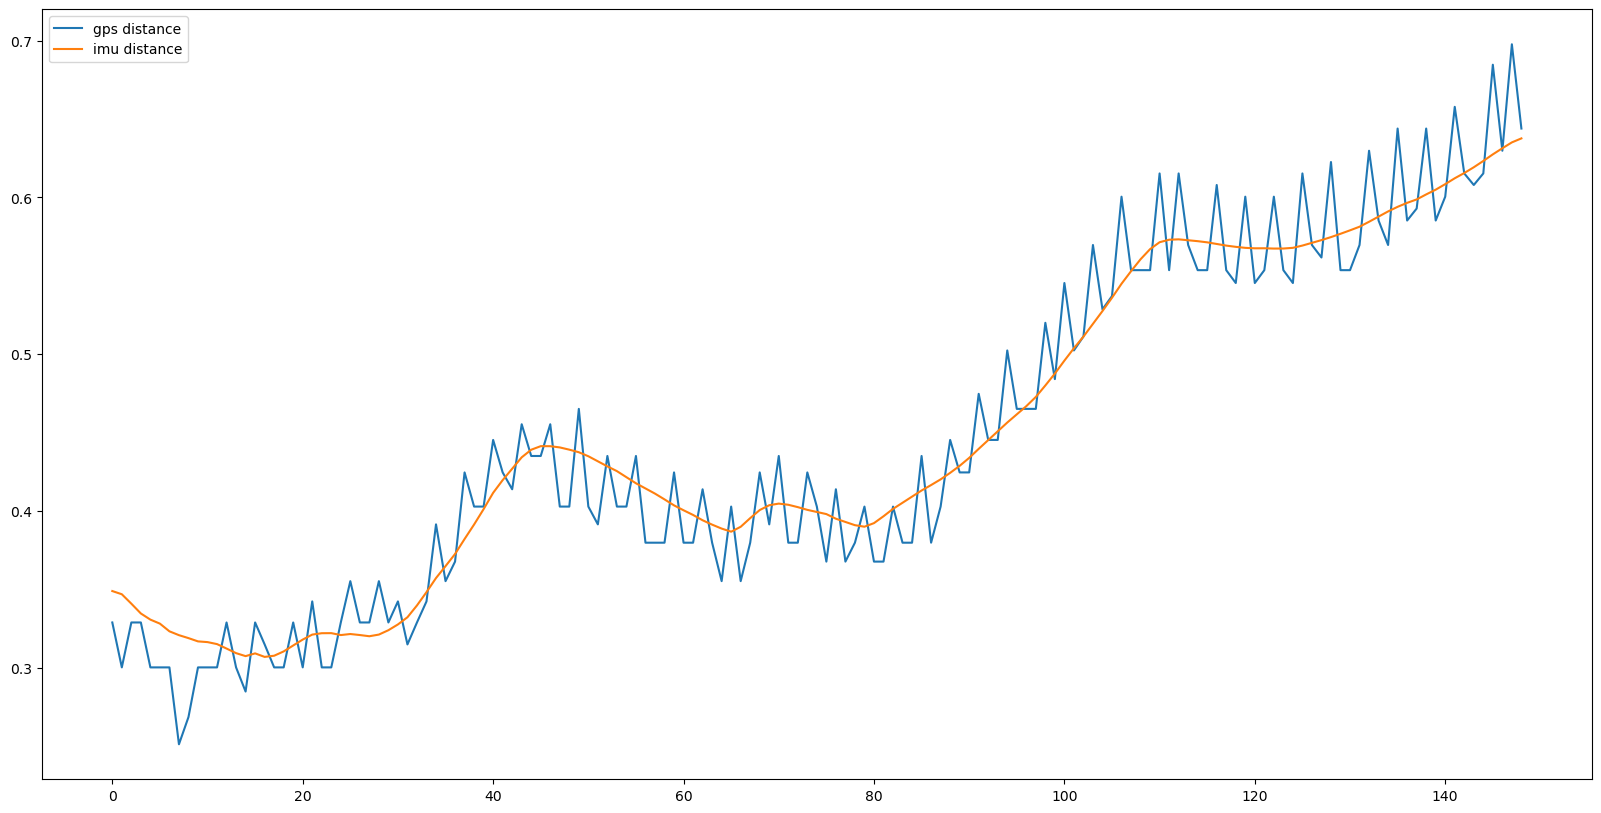

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(gps_distances, label='gps distance')
plt.plot(imu_distances, label='imu distance')
plt.legend()
plt.show()



In [6]:
import numpy as np

prev_imu_data = None
locations = []  # 初始化locations列表，使其包含150个NumPy数组


for frame in range(150):
    imu_data = read_imu('./a_data/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt' % frame)
    if prev_imu_data is not None:
        displacement = [0.1 * np.linalg.norm(imu_data[['vf', 'vl']])]
        yaw_change = float(imu_data.yaw.iloc[0] - prev_imu_data.yaw.iloc[0])
        for i in range(len(locations)):
            x0, y0 = locations[i]
            x1 = x0 * np.cos(yaw_change) + y0 * np.sin(yaw_change) - displacement
            y1 = -x0 * np.sin(yaw_change) + y0 * np.cos(yaw_change)
            locations[i] = np.append(x1,y1)
            
    locations += [np.array([0, 0])] # 使用append将NumPy数组添加到locations列表
    prev_imu_data = imu_data


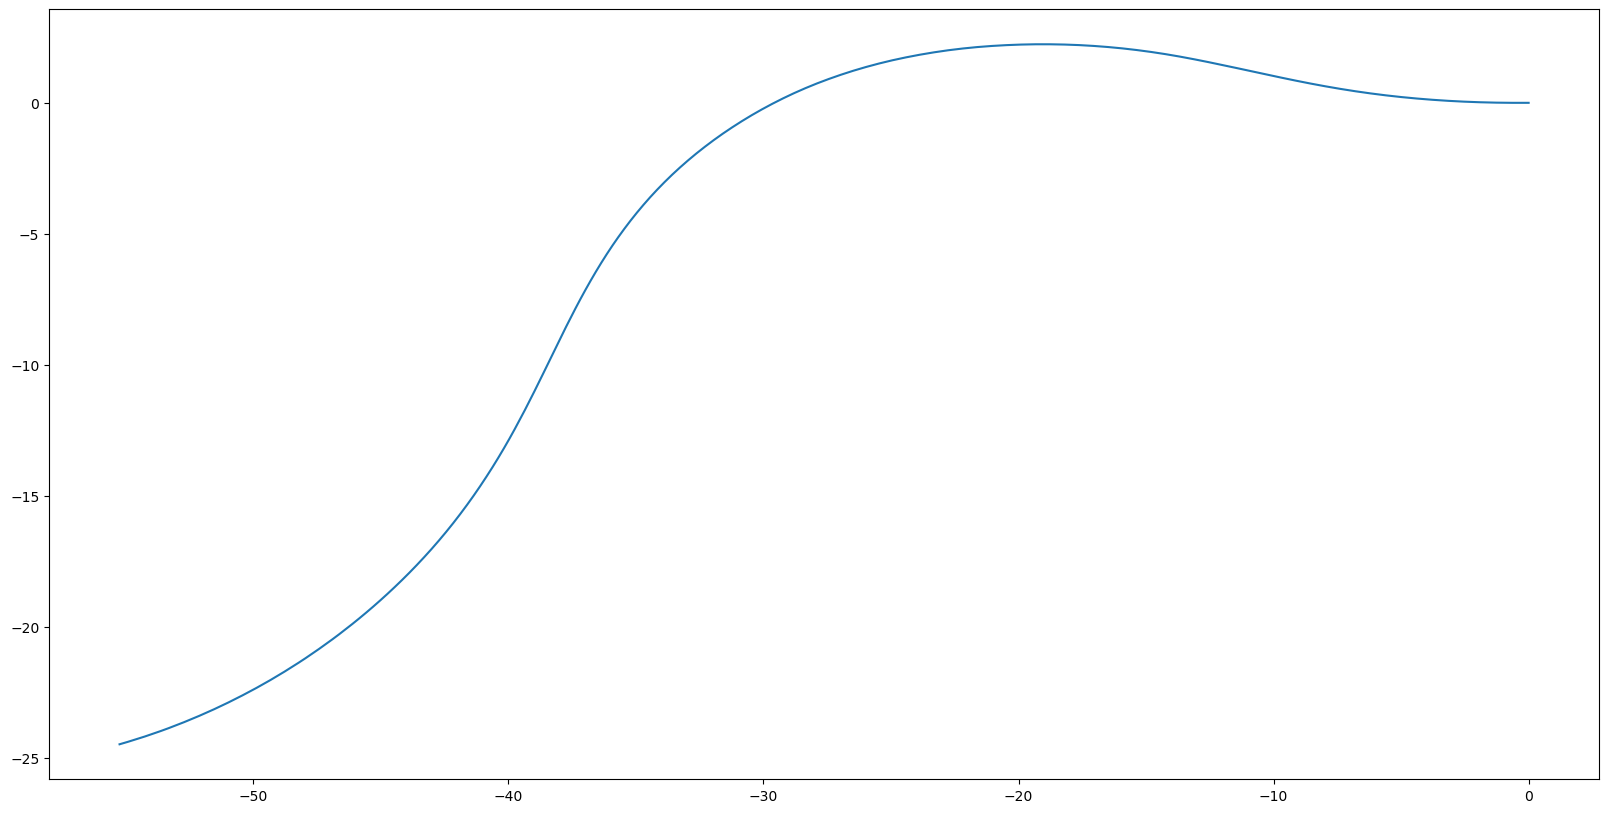

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(np.array(locations)[:,0],np.array(locations)[:,1])
plt.show()
